# Iris Clustering

- Author : Rijal Ghodi
- Email  : rijalgdev@gmail.com
- Github : https://github.com/rijalghodi

## Objective

The objective of this project is to develop an optimal model for clustering iris flowers species using the Iris dataset. Additionally, we aim to build a multiclass classification model to classify unseen iris flowers based on the insights gained from the clustering analysis.

Dataset

You can download the dataset from the following link: [Iris Dataset](https://drive.google.com/file/d/1j3qxOQxnjVk-wZuRE92J7sRhXeqj_piO/view?usp=sharing)

Columns in datasets are:
- `sepal length (cm)`
- `sepal width (cm)`
- `petal width (cm)`
- `petal width (cm)`
- `species`

Approach
- Exploratory Data Analysis (EDA): Analyze the dataset to extract valuable insights.
- Feature Engineering: Transform and refine the features to improve model performance.
- Clustering Model Building: Identify the appropriate clustering algorithm and determine the optimal number of clusters.
- Build a multiclass classification model by leveraging the insights from the clustering model.

In [1]:
import pandas as pd
import numpy as np
import scipy
import warnings
warnings.filterwarnings("ignore")

# Plotting Usage
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.shape

(150, 5)

In [4]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## EDA (Exploratory Data Analysis)

In [5]:
# Define feature and target columns

target_columns = ['species']

feature_columns = df.columns.values
feature_columns = feature_columns[feature_columns != target_columns]

feature_columns

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
 'petal width (cm)'], dtype=object)

In [6]:
# Create a function to display the distribution of iris species based on two features

def display_iris_distributions(df, hue=None):
    """
    function to display the distribution of iris species based on two features

    args:
        - df (Dataframe):  containing the iris dataset
        - hue (string): the target column name 
    """
    # Number of feature columns
    n = 4

    fig, axes = plt.subplots(2, 3, figsize=(20, 10))

    counter = 0  # Counter to keep track of subplot index

    for i in range(n - 1):
        for j in range(i + 1, n):
            # Plot on the current subplot
            sns.scatterplot(data=df, x=feature_columns[i], y=feature_columns[j], ax=axes[counter // 3, counter % 3], hue=hue)
            axes[counter // 3, counter % 3].set_title(f'{feature_columns[i]} vs {feature_columns[j]}')
            counter += 1  # Move to the next subplot

    # Adjust layout
    plt.tight_layout()

    # # Show the plot
    plt.show()

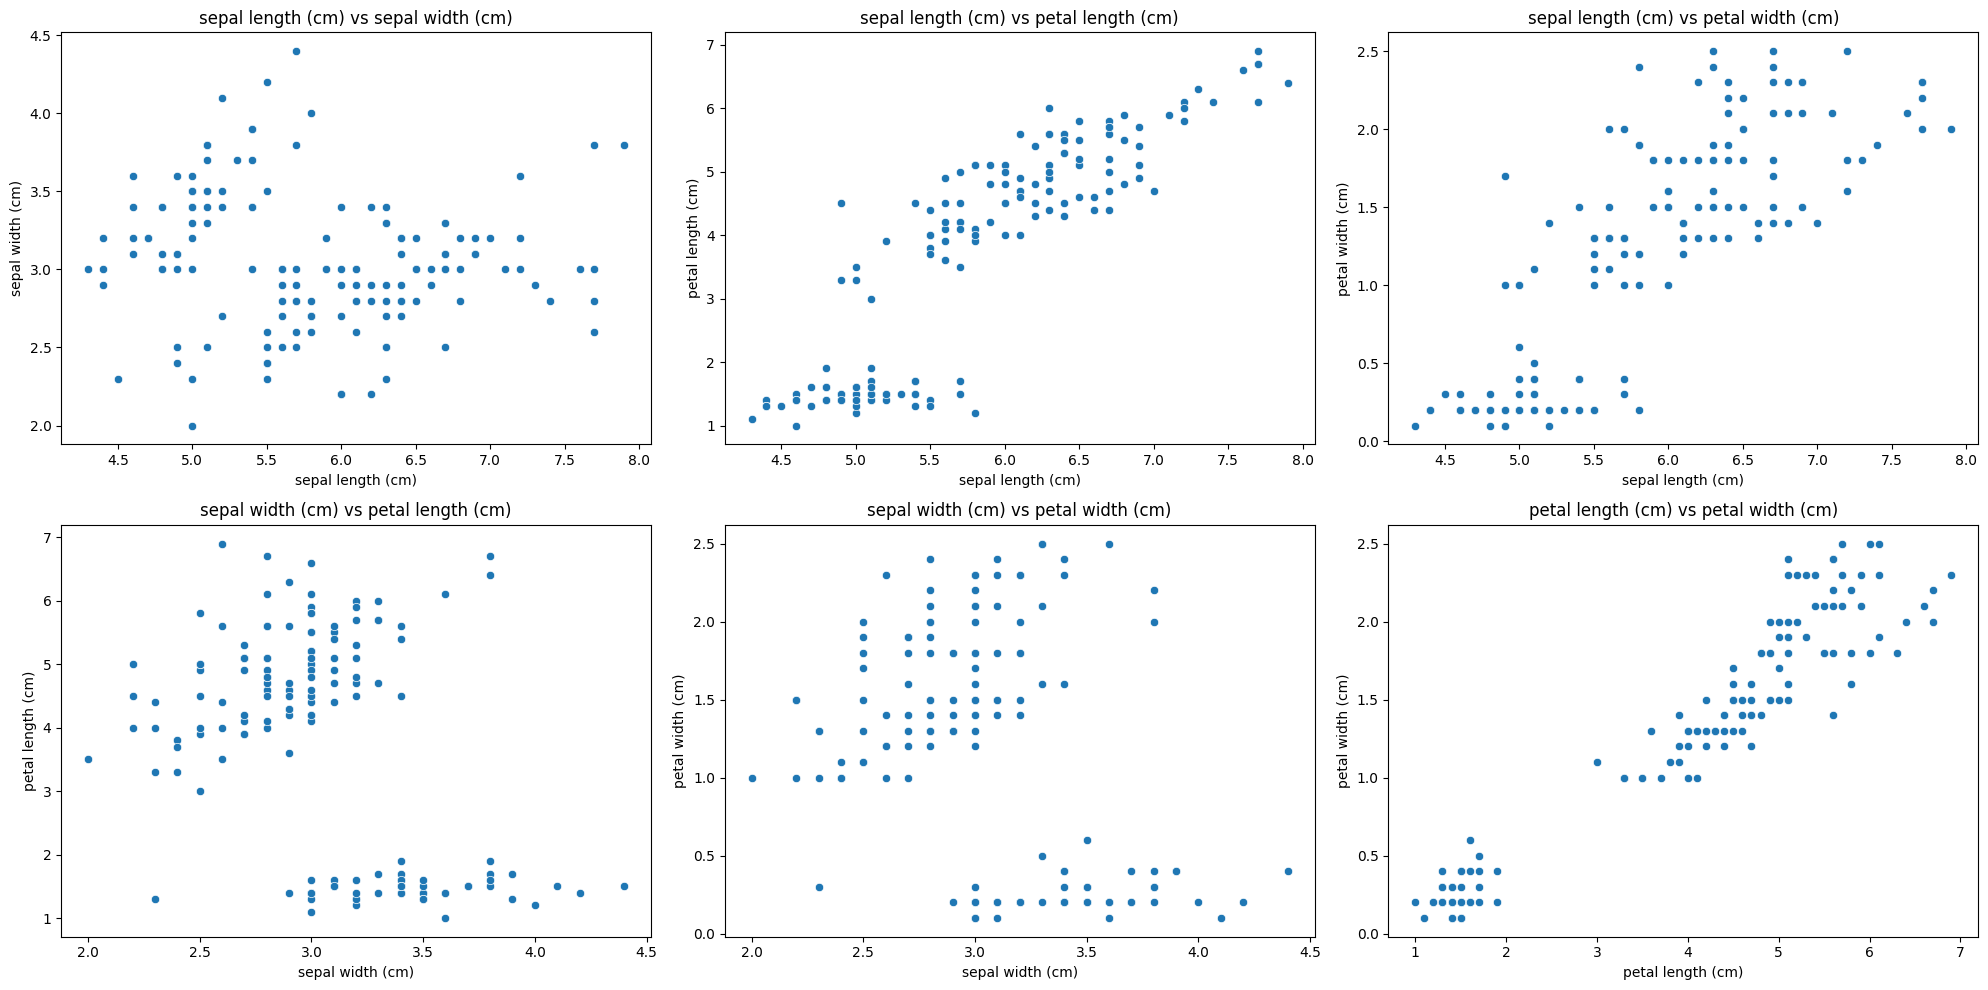

In [7]:
display_iris_distributions(df=df)

In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


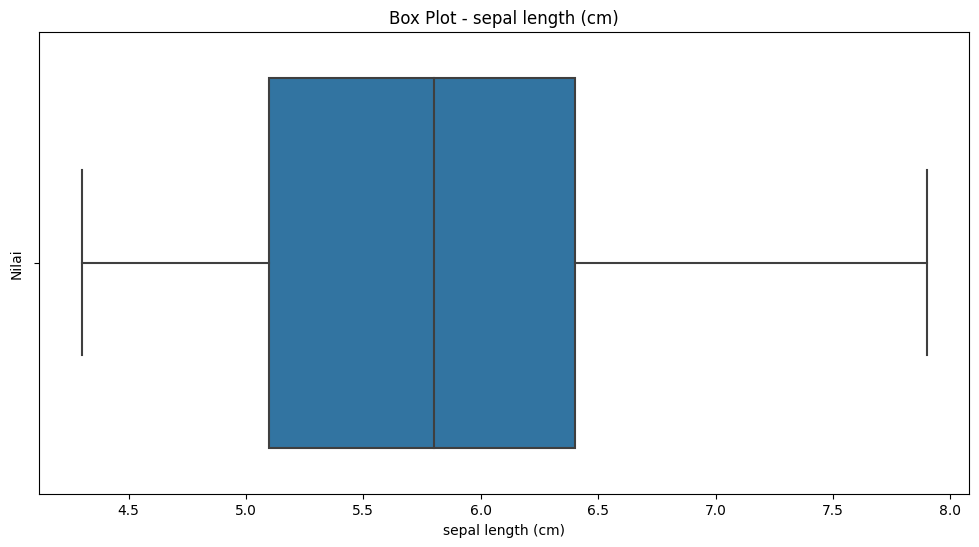

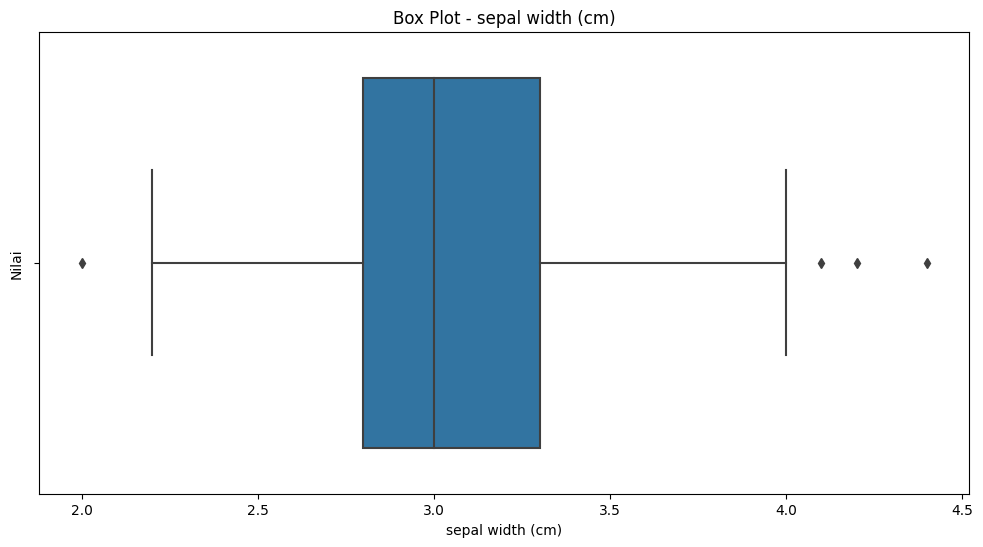

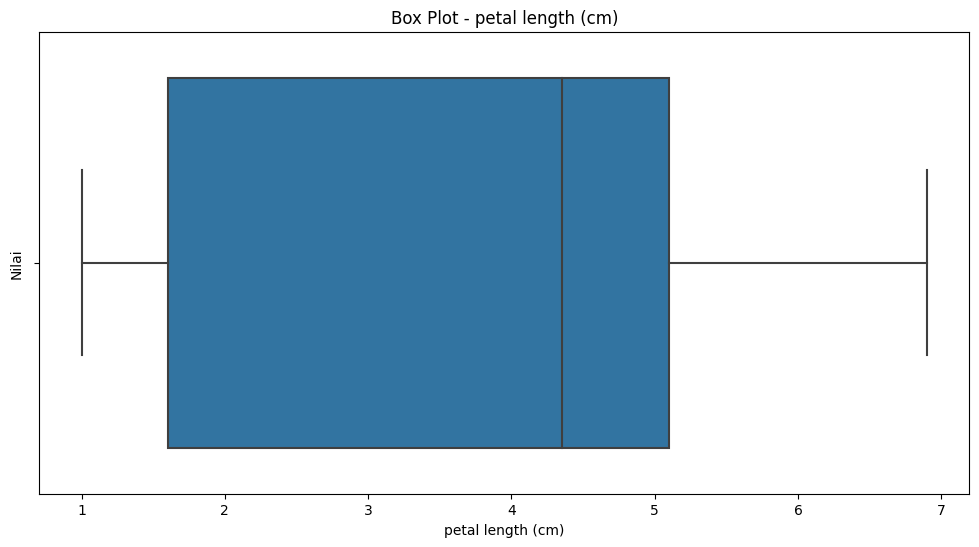

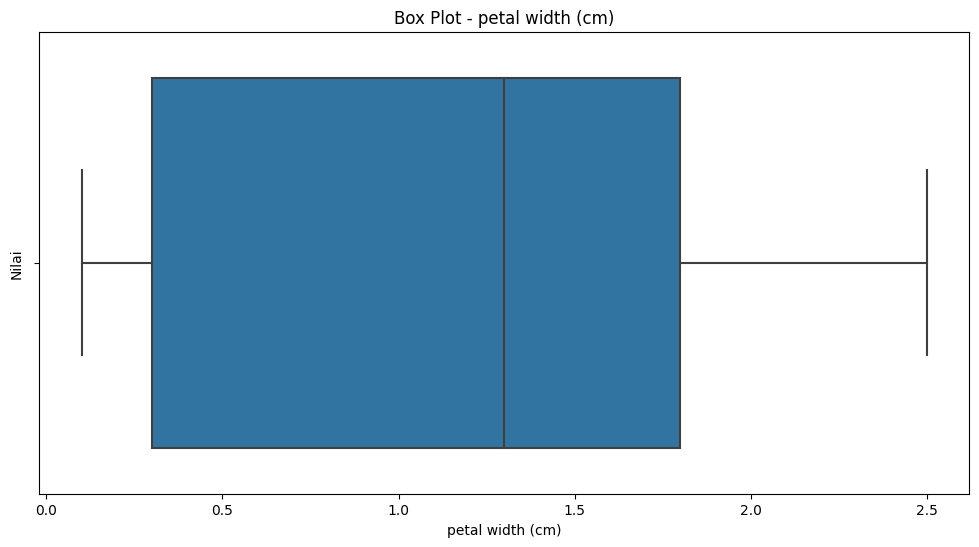

In [9]:
for col in feature_columns:
    # Box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, data=df)
    plt.title(f'Box Plot - {col}')
    plt.xlabel(col)
    plt.ylabel('Nilai')
    plt.show()

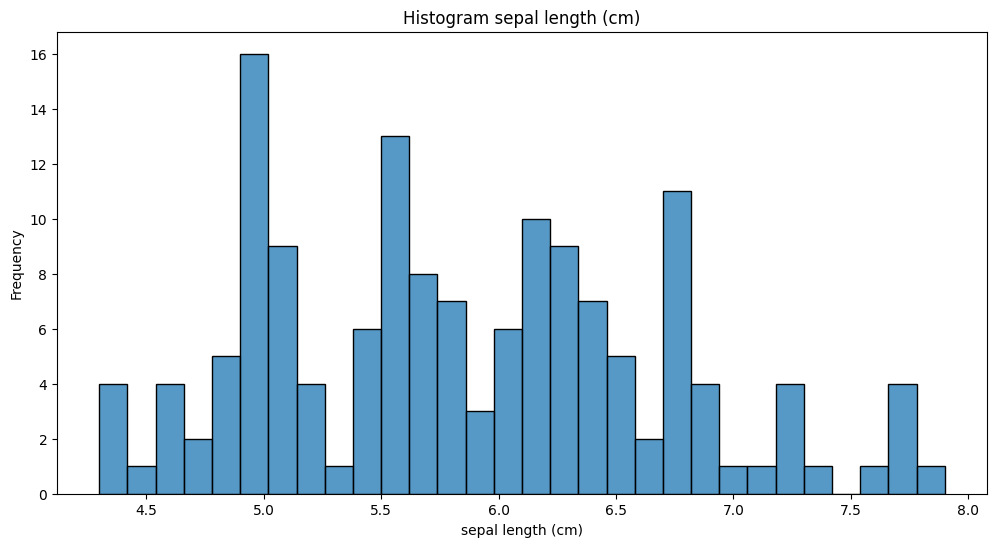

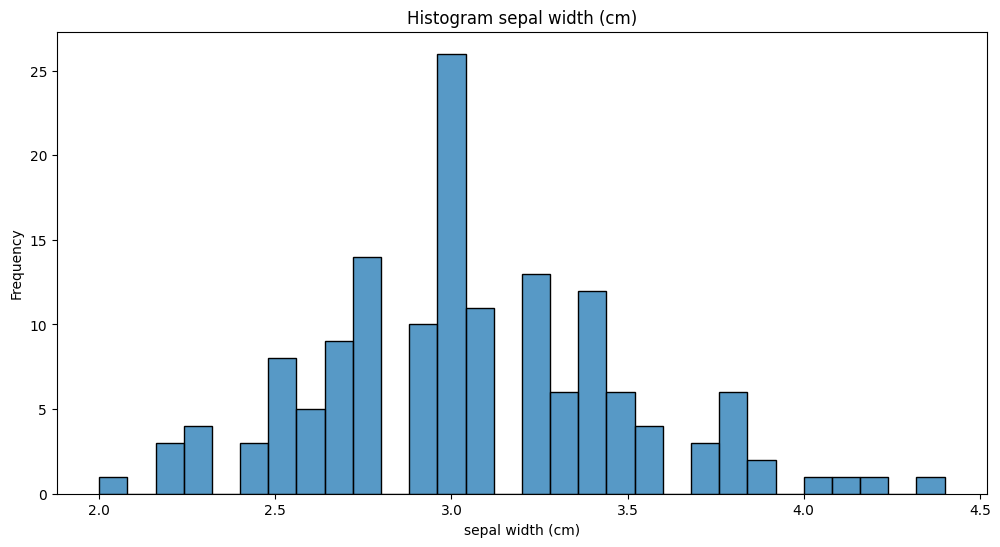

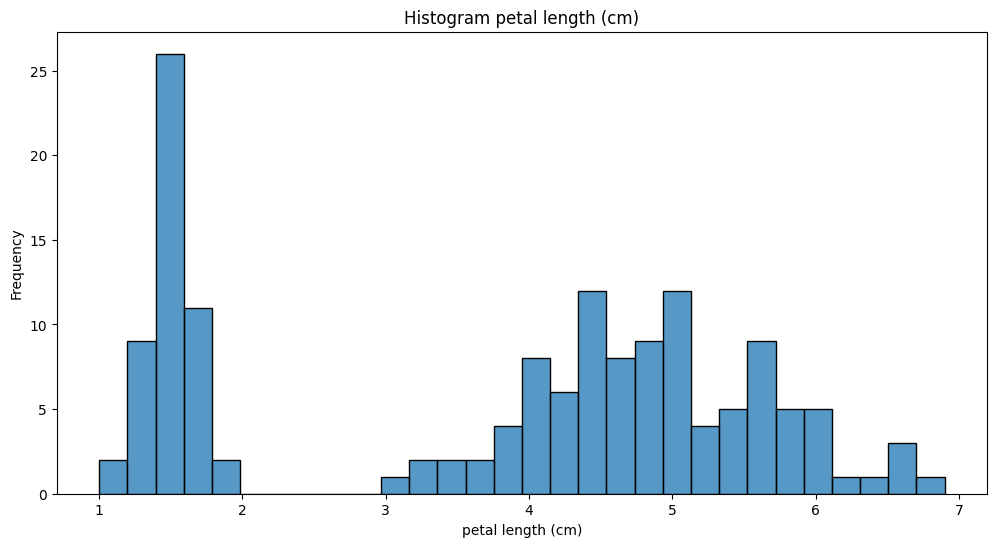

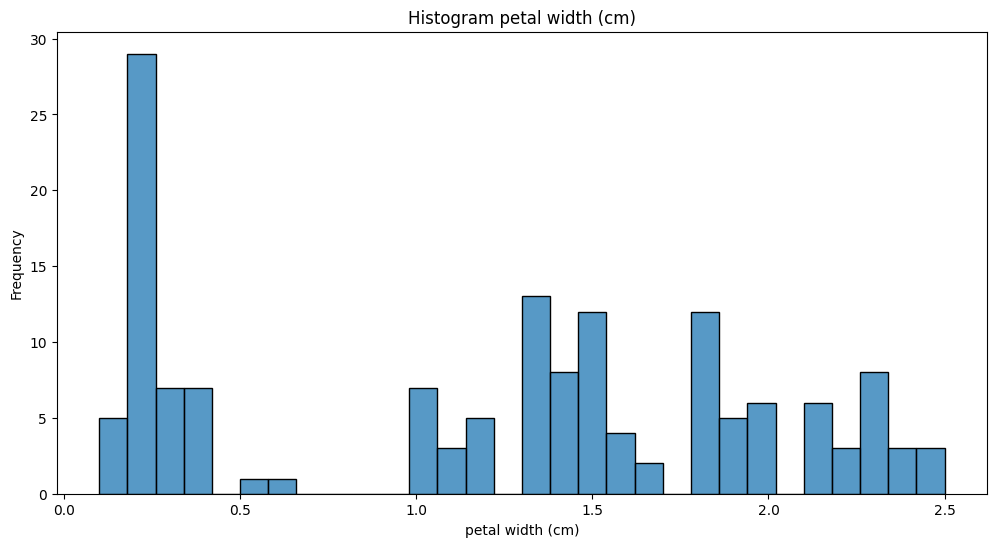

In [10]:
# Histogram

for col in feature_columns:
    # Histogram
    plt.figure(figsize=(12, 6))
    sns.histplot(df[col], bins=30, kde=False)
    plt.title(f'Histogram {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Feature Engineering

  **Unsupervised Learning doesn't need to perform data splitting.**

  Our strategy: 
1. Removing Duplicates
2. Outlier Handling (optional) -> At this step, outlier handling is not necessary as the petal and sepal sizes are still reasonable.
3. Feature Scaling

### Drop Duplicates

In [11]:
# Drop Duplicates

print(f"Dataframe dimension before duplication drop {df.shape[0]}")

df = df.drop_duplicates().reset_index(drop=True)

print(f"Dataframe dimension after duplication drop {df.shape[0]}")

Dataframe dimension before duplication drop 150
Dataframe dimension after duplication drop 149


### Feature Scaling

In [12]:
X = df[feature_columns].values
y = df[target_columns].values #anotator label

In [13]:
# Feature Scalling
from sklearn.preprocessing import MinMaxScaler
scaled_X = MinMaxScaler().fit_transform(X)
scaled_df = pd.DataFrame(data = scaled_X, columns = feature_columns)
scaled_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,149.000000,149.000000,149.000000,149.000000
mean,0.428784,0.441555,0.465931,0.456096
std,0.230792,0.181809,0.299626,0.317759
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.559322,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


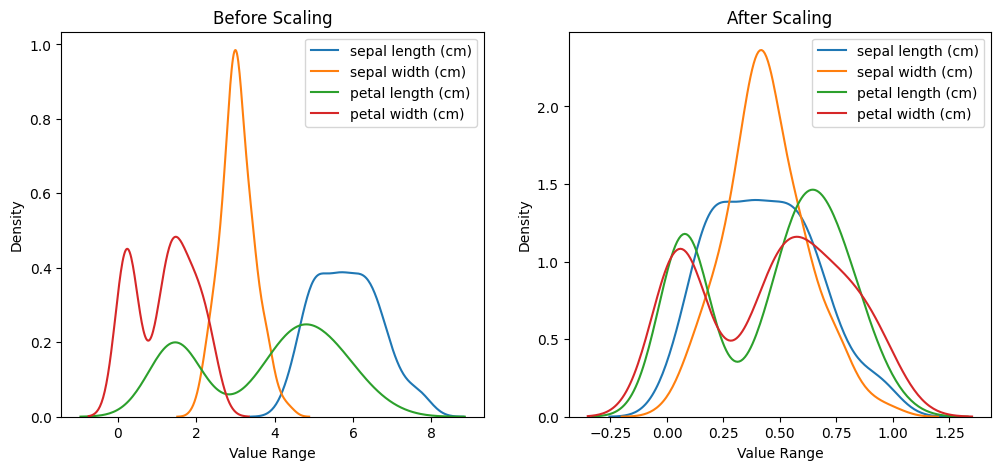

In [14]:
# Compare original df and scaled df

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot original df distribution
ax1.set_title('Before Scaling')
for col in feature_columns:
    sns.kdeplot(df[col], ax=ax1, label=col)


# Plot scaled df distribution
ax2.set_title('After Scaling')
for col in feature_columns:
    sns.kdeplot(scaled_df[col], ax=ax2, label=col)

# Set x-labels
ax1.set_xlabel('Value Range')
ax2.set_xlabel('Value Range')

ax1.legend()
ax2.legend()

plt.show()

## K-means Clustering
Pada pembahasan kali ini akan diuji 2 metode pemilihan nilai cluster (K) yang terbaik, mendekati distribusi pada label anotator.
1. Metode Elbow
2. Via-Score plot

### 1. Evaluation Via Elbow Method

Text(0, 0.5, 'Intertia / WSS')

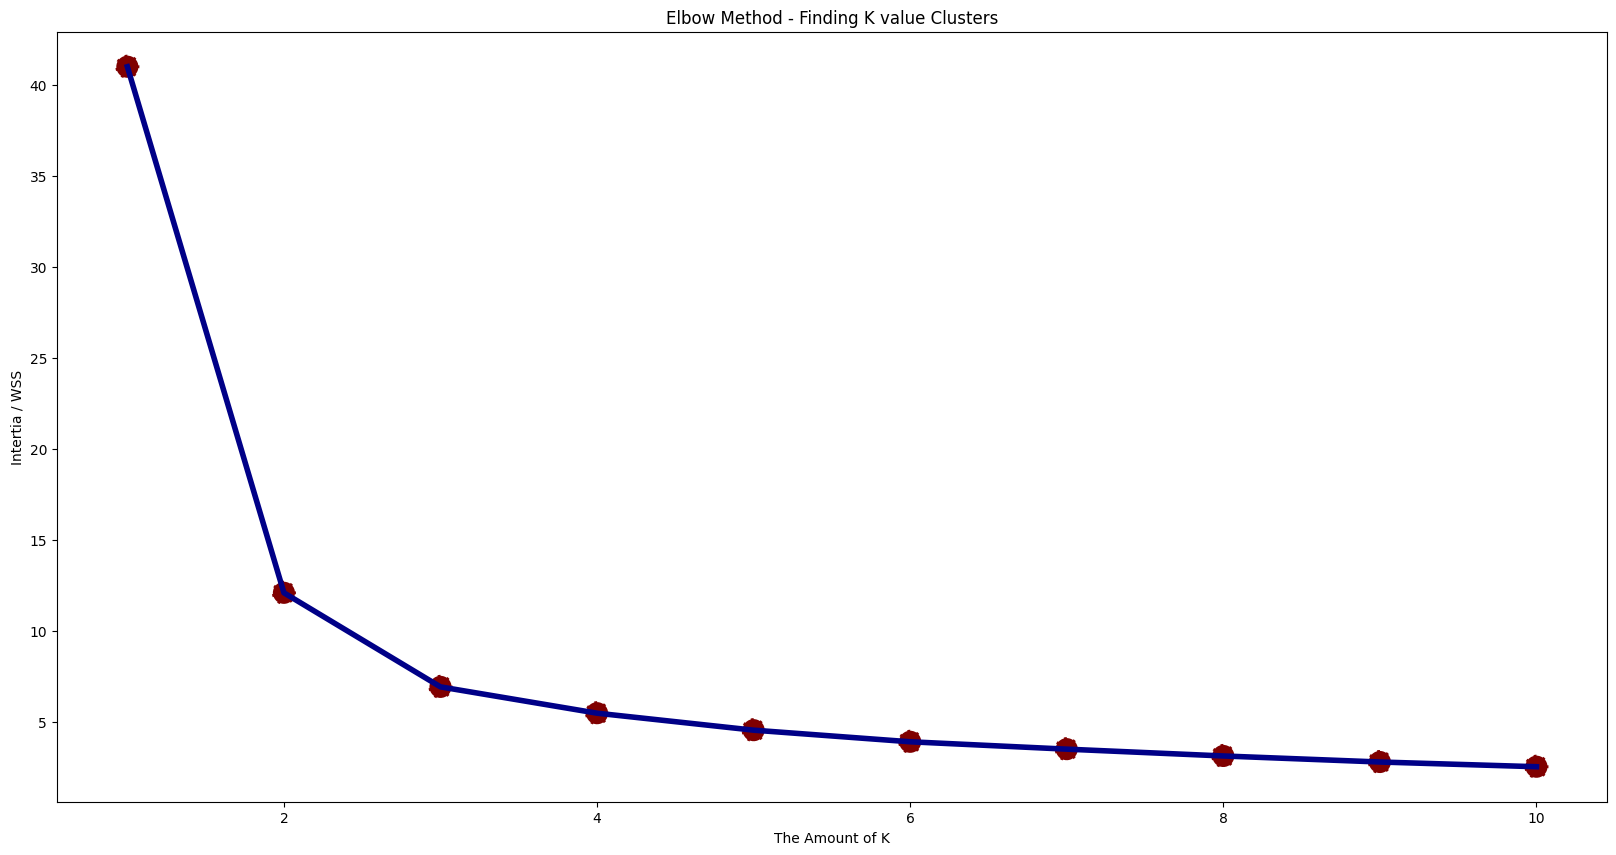

In [15]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_df.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.title('Elbow Method - Finding K value Clusters')
plt.xlabel('The Amount of K')
plt.ylabel('Intertia / WSS')

In [16]:
#Dari hasil diatas elbow nya dipilih pada angka 3,
# karena titik awal sebelum titik selanjutnya memiliki gap yang konstan atau
# titik setelah lekukan tajam sebelum mendatar
from sklearn.cluster import KMeans
kmeans_elbow = KMeans(n_clusters=3, random_state=42)
kmeans_elbow.fit(scaled_df.values)

KMeans(n_clusters=3, random_state=42) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. KMeans KMeans(n_clusters=3, random_state=42)

In [17]:
#taruh hasil k-means elbow method ke df dengan nama kolom cluster_elbow
df['cluster_elbow'] = kmeans_elbow.labels_

In [18]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_elbow
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


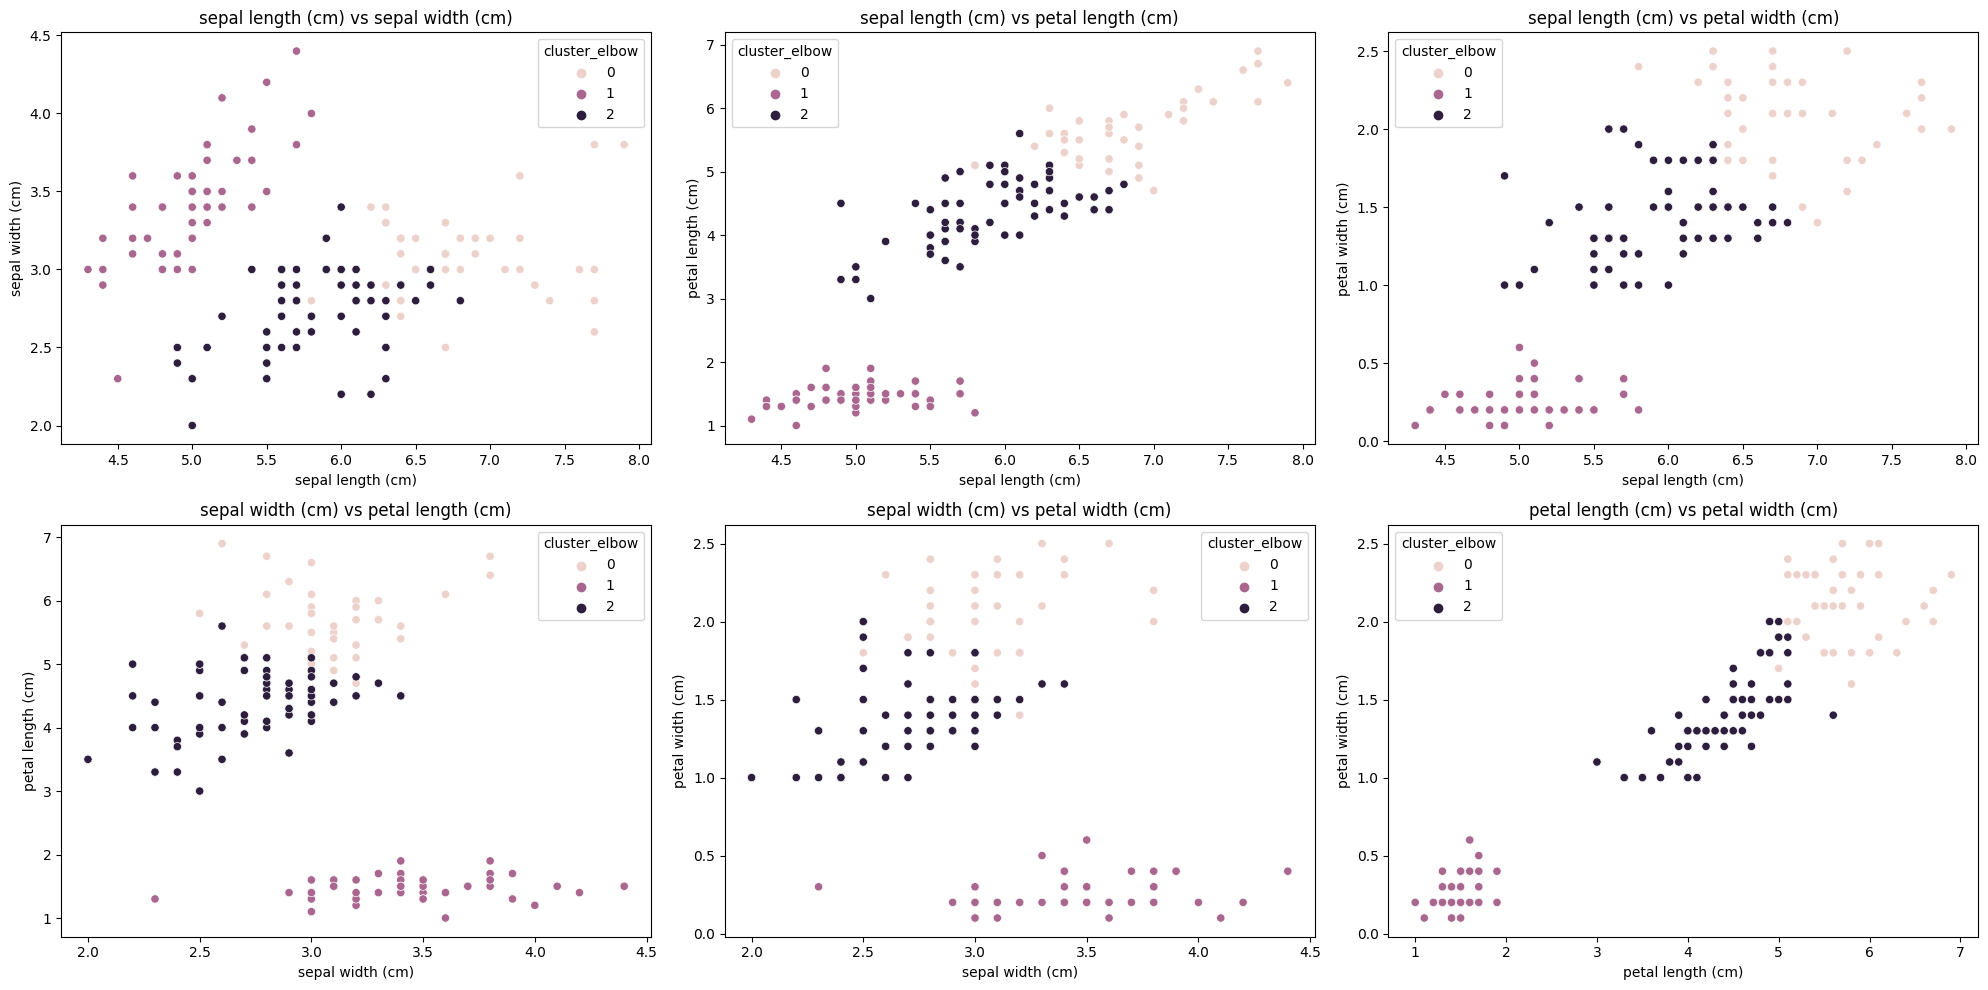

In [19]:
display_iris_distributions(df=df, hue="cluster_elbow")

#### Anotator Comparison

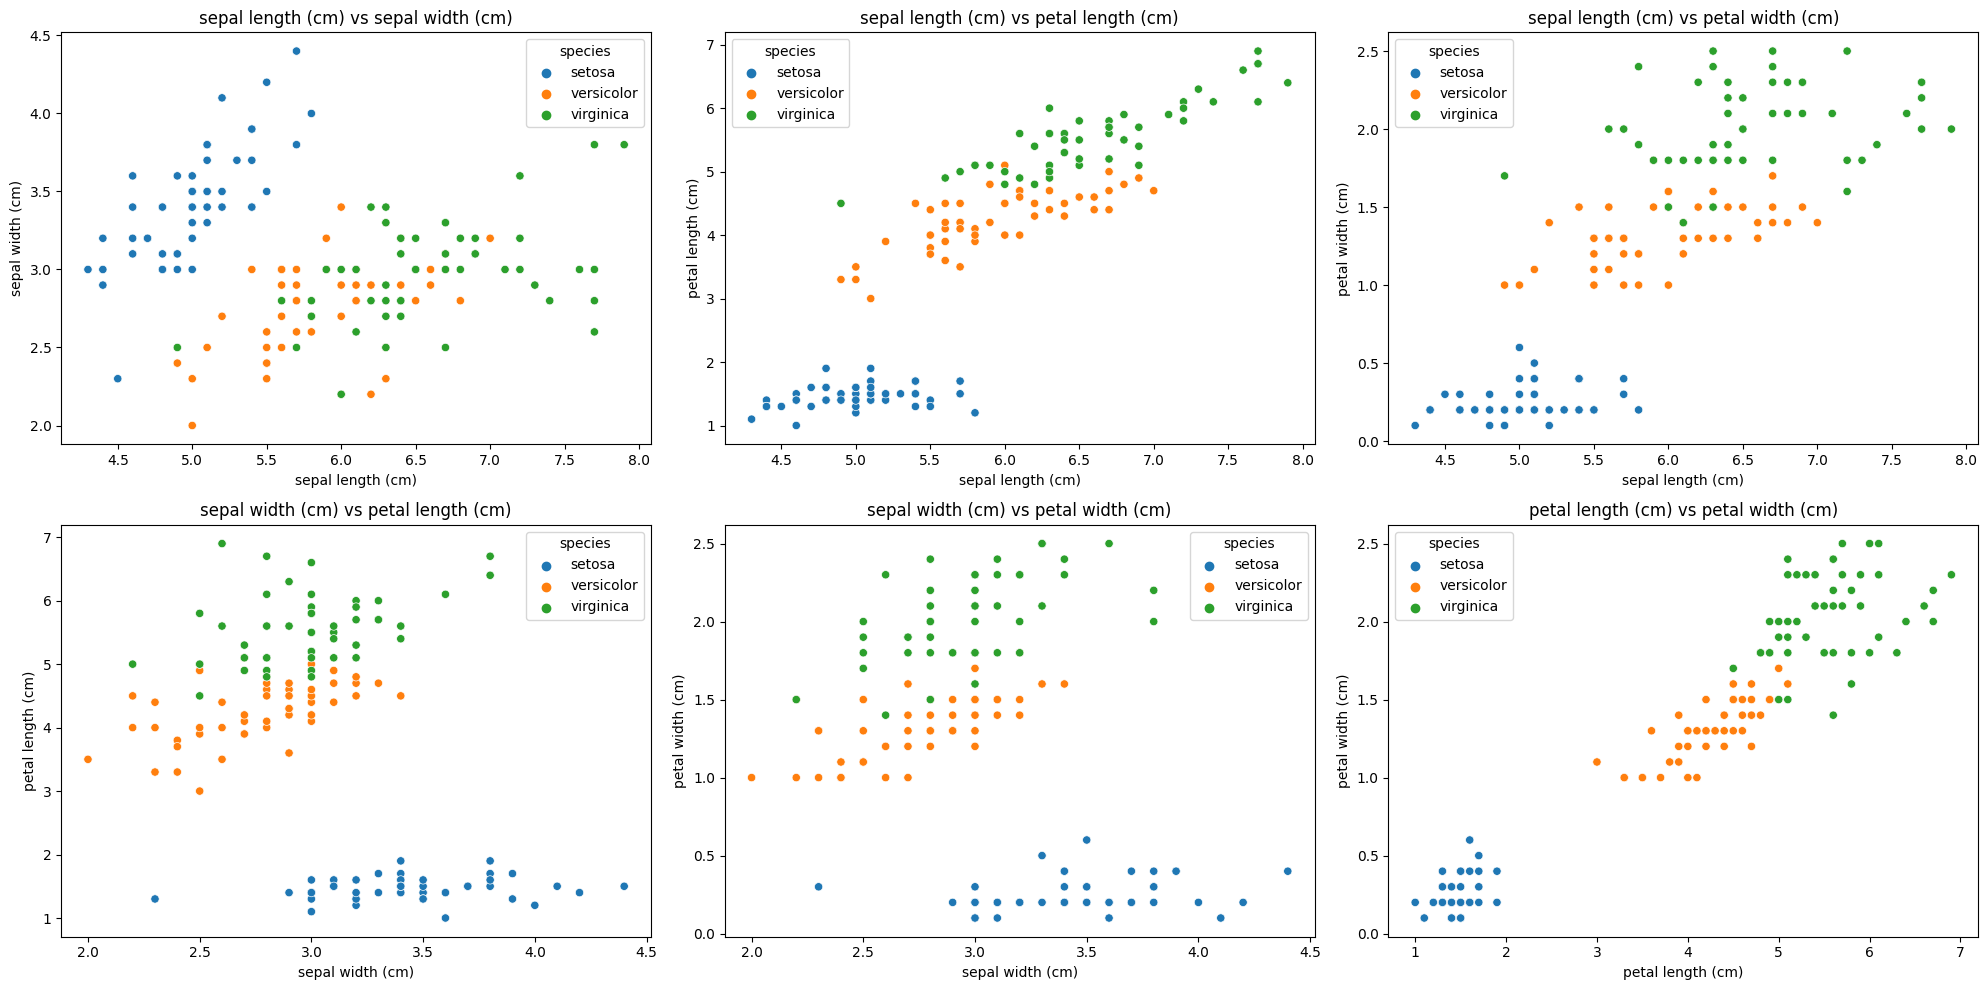

In [20]:
display_iris_distributions(df=df, hue="species")

#### Conclusion

The results obtained using the elbow method are deemed optimal as the clusters align with the annotated labels provided in the description. This is characterized by:

- Cluster 0 corresponds to the virginica species.
- Cluster 1 corresponds to the sentosa species.
- Cluster 2 corresponds to the versicolor species.
- Cluster 3 corresponds to the Obese category.

### 2. Evaluation Via Score Plot

In [21]:
!pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 26.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

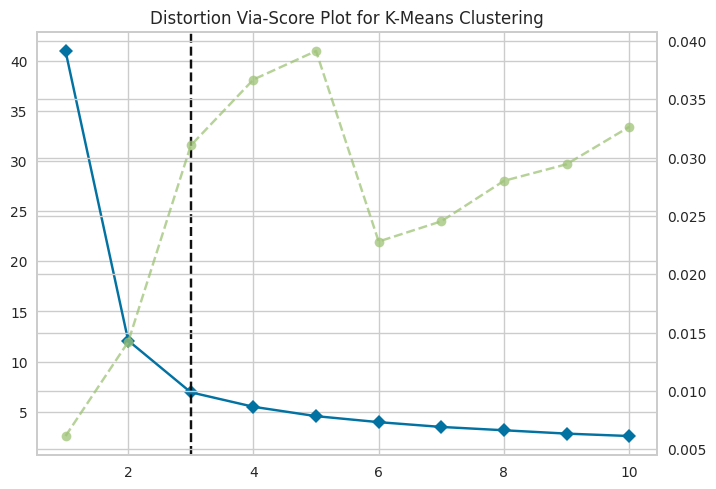

In [22]:
# Via Score Plot
from yellowbrick.cluster import KElbowVisualizer
k_means_via = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(k_means_via, k=(1,11), timings= True)
visualizer.fit(scaled_df.values)        # Fit the data to the visualizer
plt.title('Distortion Via-Score Plot for K-Means Clustering')
plt.show()

#### Conclusion

Since the number of clusters determined by the via score plot method matches by elbow methods, the conclusion remains consistent.

## Multiclass Classification

We want to use the target label in clustering to build classification machine to classify unseen and new iris flower


Here is the steps:

1. Use the `sepal length (cm)`, `sepal width (cm)`, `petal width (cm)`, and `petal width (cm)` columns as predictors (X)
2. The `cluster_elbow` column will be used as the label or target (y).
3. Select best model for iris classification
4. Use the `species` column for visual evaluation of anotation vs machine learning.

### Preparation

In [23]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_elbow
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [24]:
df.cluster_elbow.value_counts(normalize=True)
#balances

2 0.402685
1 0.335570
0 0.261745
Name: cluster_elbow, dtype: float64

We observe a well-balanced distribution of classes here. Therefore, we will utilize accuracy as the evaluation metric.

In [25]:
multi_class_df = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
   'petal width (cm)', 'species', 'cluster_elbow']]
multi_class_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_elbow
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [26]:
# Splitting feature engineering Supervised

from sklearn.model_selection import train_test_split
train, test = train_test_split(multi_class_df, test_size = 0.25, random_state = 42, stratify=multi_class_df.cluster_elbow)

In [27]:
train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_elbow
0,5.1,3.5,1.4,0.2,setosa,1
46,5.1,3.8,1.6,0.2,setosa,1
41,4.5,2.3,1.3,0.3,setosa,1
11,4.8,3.4,1.6,0.2,setosa,1
34,4.9,3.1,1.5,0.2,setosa,1


In [28]:
test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_elbow
147,6.2,3.4,5.4,2.3,virginica,0
8,4.4,2.9,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
25,5.0,3.0,1.6,0.2,setosa,1
105,7.6,3.0,6.6,2.1,virginica,0


In [29]:
#label predictor (X)
X_train = train[feature_columns]
X_test = test[feature_columns]

#label target
y_train = train[['cluster_elbow']]
y_test = test[['cluster_elbow']]

### Model Selection

Here, we aim to compare the performance of the following models for iris classification:
- Logistic Regression
- Support Vector Machine (SVM)
- Naive Bayes
- K-Nearest Neighbors (KNN)

In [30]:
#import model classification for multiclass
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.svm import SVC #SVM
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.metrics import accuracy_score, classification_report #Evaluation matrix

#### Logistic Regression

In [31]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train.values.ravel())
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)

# Evaluasi model
print("Logistic Regression:")
print("Accuracy train:", accuracy_score(y_train, lr_pred_train))
print("Accuracy test:", accuracy_score(y_test, lr_pred_test))
print(classification_report(y_test, lr_pred_test))
#Akurasi yang muncul ialah akurasi dari rata-rata terhadap semua label multiclass classification

Logistic Regression:
Accuracy train: 1.0
Accuracy test: 0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      1.00      1.00        13
           2       0.94      1.00      0.97        15

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



#### SVM

In [32]:
# SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train.values.ravel())
svm_pred_train = svm_model.predict(X_train)
svm_pred_test = svm_model.predict(X_test)

In [33]:
# Evaluasi model
print("SVM:")
print("Accuracy train:", accuracy_score(y_train, svm_pred_train))
print("Accuracy test:", accuracy_score(y_test, svm_pred_test))
print(classification_report(y_test, svm_pred_test))
#Akurasi yang muncul ialah akurasi dari rata-rata terhadap semua label multiclass classification

SVM:
Accuracy train: 1.0
Accuracy test: 0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      1.00      1.00        13
           2       0.94      1.00      0.97        15

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



#### Navive Bayes

In [34]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.values.ravel())
nb_pred_train = nb_model.predict(X_train)
nb_pred_test = nb_model.predict(X_test)

In [35]:
print("\nNaive Bayes:")
print("Accuracy train:", accuracy_score(y_train, nb_pred_train))
print("Accuracy test:", accuracy_score(y_test, nb_pred_test))
print(classification_report(y_test, nb_pred_test))
#Akurasi yang muncul ialah akurasi dari rata-rata terhadap semua label multiclass classification


Naive Bayes:
Accuracy train: 1.0
Accuracy test: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        15

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



#### KNN

In [36]:
# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train.values.ravel())
knn_pred_train = knn_model.predict(X_train)
knn_pred_test = knn_model.predict(X_test)

In [37]:
print("KNN:")
print("Accuracy train:", accuracy_score(y_train, knn_pred_train))
print("Accuracy test:", accuracy_score(y_test, knn_pred_test))
print(classification_report(y_test, knn_pred_test))
#Akurasi yang muncul ialah akurasi dari rata-rata terhadap semua label multiclass classification

KNN:
Accuracy train: 0.990990990990991
Accuracy test: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       1.00      1.00      1.00        13
           2       0.93      0.93      0.93        15

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



#### Model Selection Conclusion

From the results of the four models above, all of them exhibit good performance when considering the difference between the accuracy on the training data and the test data.

## Annotated Classification vs ML Classification

In [38]:
multi_class_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_elbow
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [39]:
test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_elbow
147,6.2,3.4,5.4,2.3,virginica,0
8,4.4,2.9,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
25,5.0,3.0,1.6,0.2,setosa,1
105,7.6,3.0,6.6,2.1,virginica,0


In [40]:
nb_pred_test 

array([0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1,
 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 0, 1, 0, 0, 2, 1], dtype=int32)

In [41]:

nb_pred_test_df = pd.DataFrame(data=nb_pred_test, columns=['ml_prediction'])
nb_pred_test_df

,ml_prediction
0,0
1,1
2,1
3,1
4,0
5,1
6,2
7,2
8,2
9,2


In [42]:
# Reset index pada DataFrame test
test_reset_index = test.reset_index(drop=True)

# Concatenate DataFrame prediksi_ml dengan DataFrame test yang telah di-reset index
test = pd.concat([test_reset_index, nb_pred_test_df], axis=1)
test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_elbow,ml_prediction
0,6.2,3.4,5.4,2.3,virginica,0,0
1,4.4,2.9,1.4,0.2,setosa,1,1
2,4.9,3.0,1.4,0.2,setosa,1,1
3,5.0,3.0,1.6,0.2,setosa,1,1
4,7.6,3.0,6.6,2.1,virginica,0,0


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

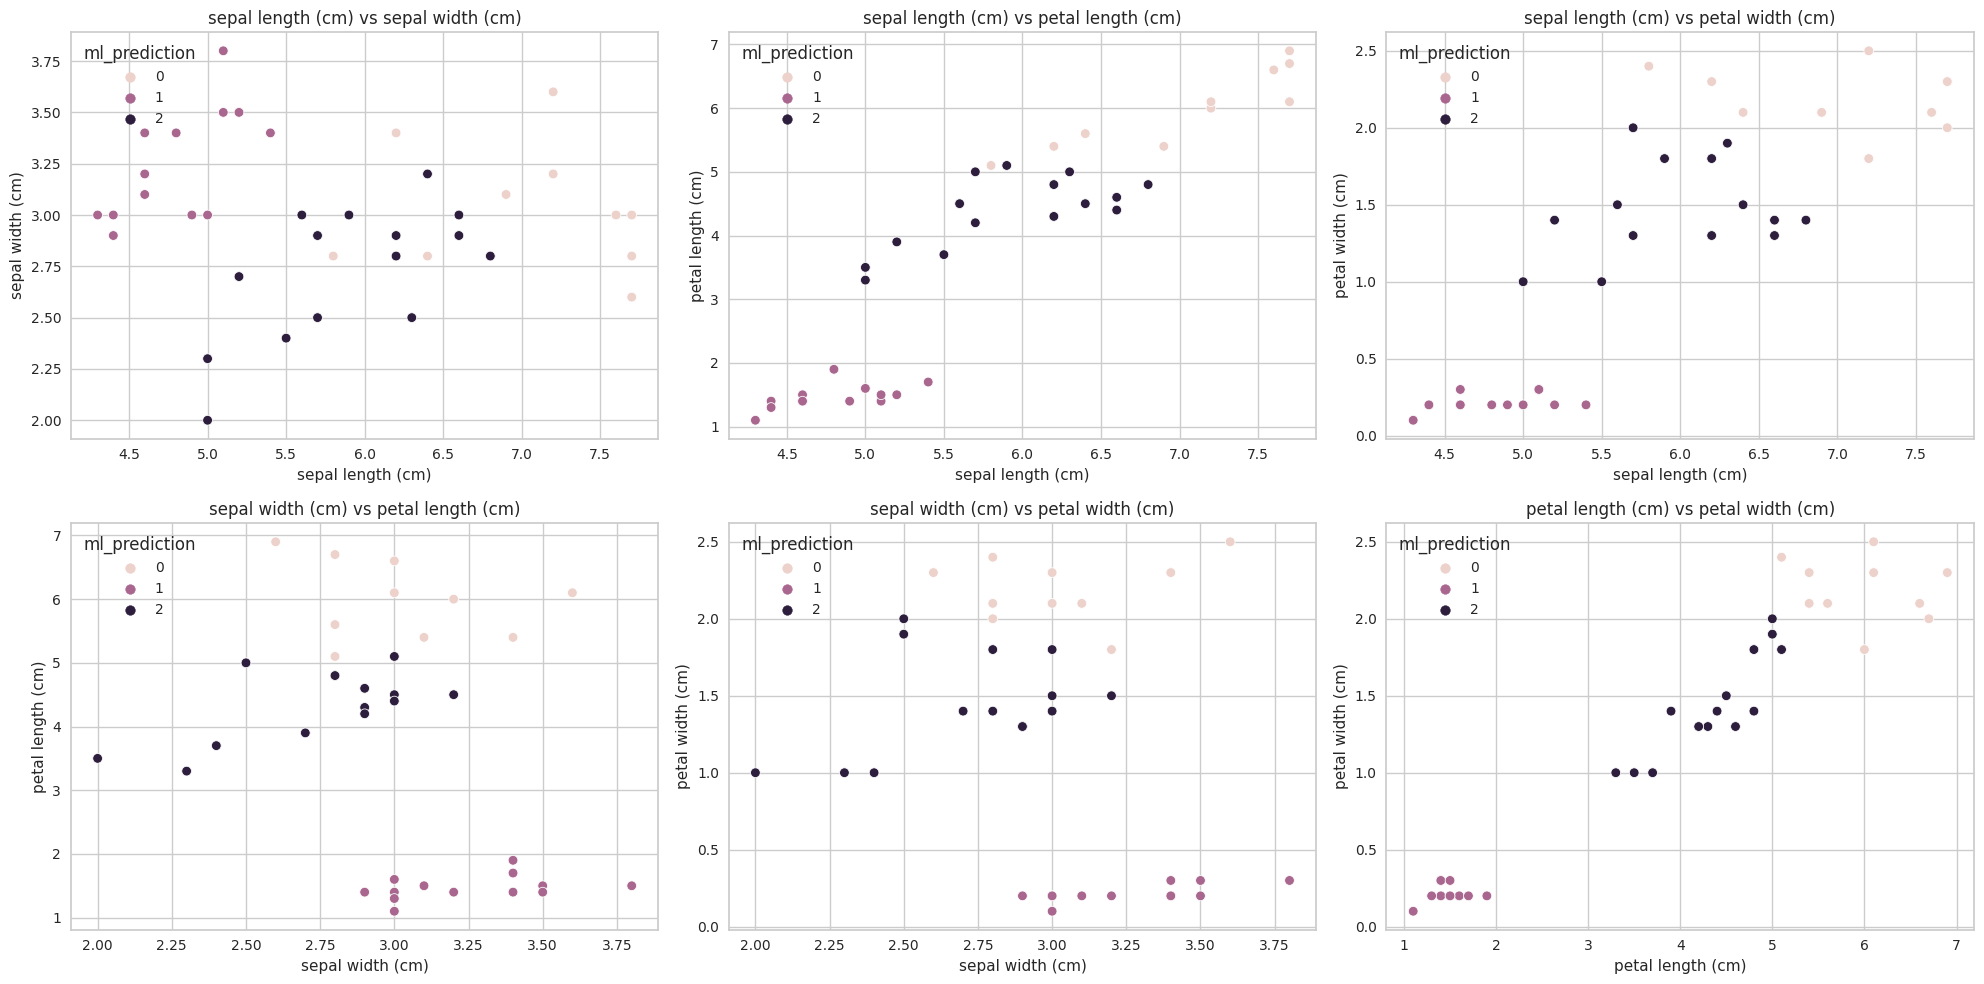

In [43]:
display_iris_distributions(df=test, hue='ml_prediction')

In [44]:
test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_elbow,ml_prediction
0,6.2,3.4,5.4,2.3,virginica,0,0
1,4.4,2.9,1.4,0.2,setosa,1,1
2,4.9,3.0,1.4,0.2,setosa,1,1
3,5.0,3.0,1.6,0.2,setosa,1,1
4,7.6,3.0,6.6,2.1,virginica,0,0


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

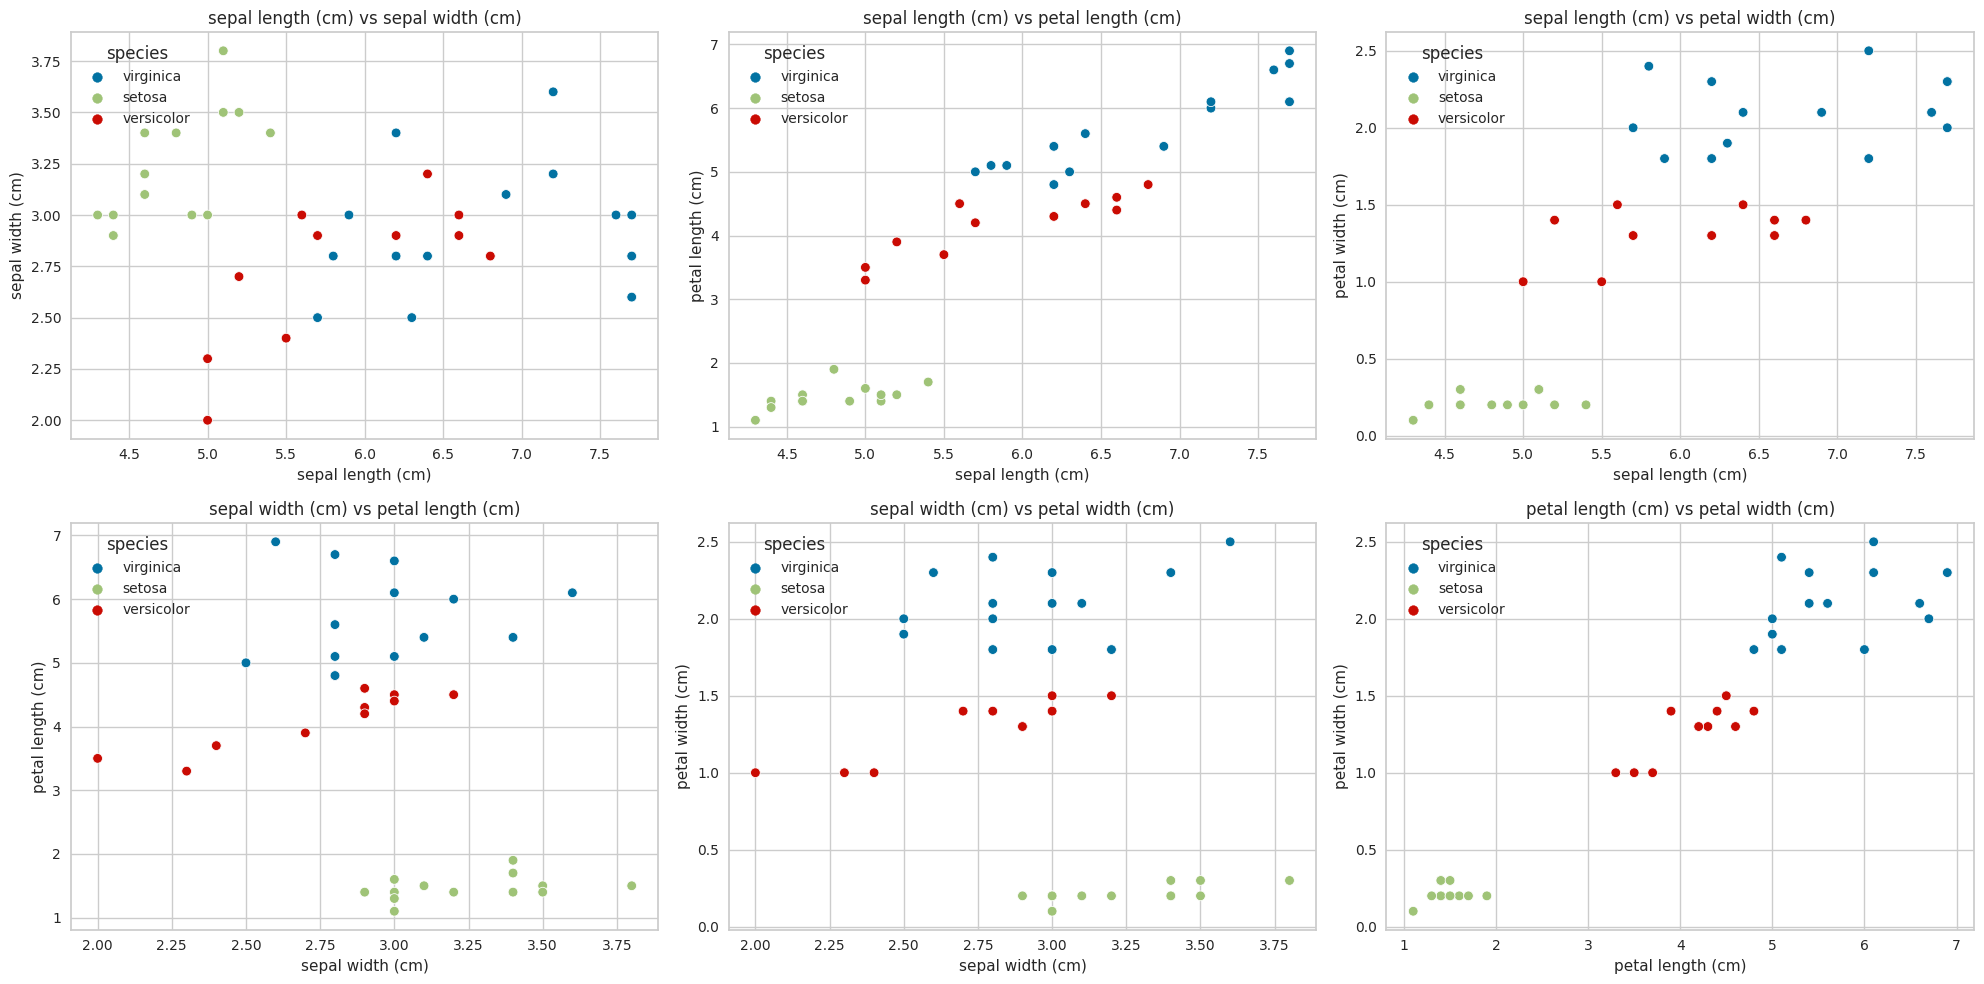

In [45]:
display_iris_distributions(df=test, hue='species')

### Conclusion

From the visualization results on the above test, there are a few points that appear mixed in the description labels, but from the machine learning prediction results, they are not mixed. However, this is only a minor observation, and in terms of distribution, it is evident that the machine learning predictions are performing well in predicting multiclass categories.